### K-Nearest Neighbor(KNN) Algorithm  -- (Practies)
###### * In the k-Nearest Neighbours algorithm k is just a number that tells the algorithm how many nearby points or neighbors to look at when it makes a decision.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [2]:
knn = pd.read_csv("KNNAlgorithmDataset.csv")

In [3]:
knn.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Exprolation

In [4]:
knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
knn.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
print("Duplicates Values", knn.duplicated().sum())

Duplicates Values 0


#### Data Cleaning

In [7]:
knn.drop(columns=['id', 'Unnamed: 32'],inplace=True)

In [8]:
knn.sample(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
551,B,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.203,...,12.02,28.26,77.8,436.6,0.1087,0.1782,0.1564,0.06413,0.3169,0.08032


In [9]:
knn['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

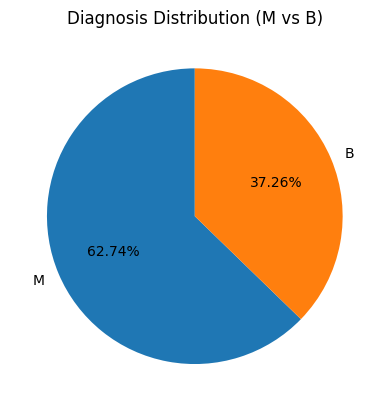

In [10]:
# Pie Plot with Diagnosis Feature
labels = ['M','B']
plt.pie(knn['diagnosis'].value_counts(), autopct='%.2f%%', labels=labels, startangle=90)
plt.title("Diagnosis Distribution (M vs B)")
plt.show()

In [11]:
x = knn.drop('diagnosis', axis=1)
y = knn['diagnosis']   #Target feature

In [12]:
# Data Train test split  --- (90% data train and 10% data test)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [13]:
x_train.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,0.06782,...,30.0,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.1051


In [14]:
y_train.head()

82     M
39     M
271    B
79     B
2      M
Name: diagnosis, dtype: object

### Scaling Data

In [15]:
# Applying StandarScaler to convert 0 and 1 number
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Algorithm Apply (KNN)

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(x_train, y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [46]:
# Prediction test data
y_pred = knn_model.predict(x_test)

In [47]:
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B'], dtype=object)

In [48]:
# Check model accuracy
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9473684210526315


In [76]:
# Check Confusion matrix  
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n', cm)

Confusion Matrix
 [[38  2]
 [ 1 16]]


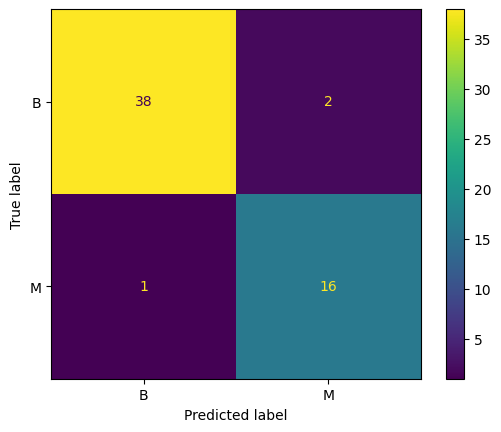

In [74]:
# Confusion matrix plot 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B','M'])
disp.plot()
plt.show()

In [66]:
# model report using classification report check model behavior
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           B       0.97      0.95      0.96        40
           M       0.89      0.94      0.91        17

    accuracy                           0.95        57
   macro avg       0.93      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



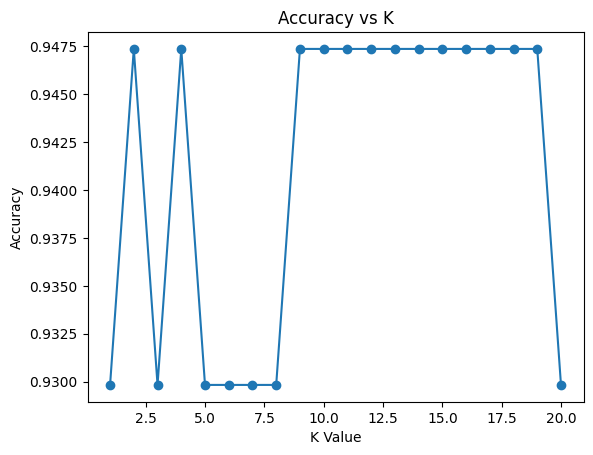

In [70]:
#Accuracy vs K value  multiple numbers change and checking model performance
acc = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred_k = model.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred_k))
    
# Create Graph
plt.plot(range(1,21), acc, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()
